<a href="https://colab.research.google.com/github/castrooyoo/Data-analysis/blob/master/competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
Train = pd.read_csv('Train.csv')
Test = pd.read_csv('Test.csv')

In [0]:
te = Test.set_index(keys='Rider Id')
ri = Riders.set_index(keys='Rider Id')

NameError: ignored

In [0]:
t = Train.set_index(keys='Rider Id')
r = Riders.set_index(keys='Rider Id')

NameError: ignored

In [0]:
Train = t.join(r)
Test = te.join(ri)

In [0]:
Train = Train.reset_index()
Test = Test.reset_index()

### get information about all columns

In [0]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 30 columns):
index                                        21201 non-null int64
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday

In [0]:
Train.isnull().sum()

index                                            0
Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekda

In [0]:
Train['Temperature'].fillna(Train['Temperature'].mean(),inplace=True)
Test['Temperature'].fillna(Test['Temperature'].mean(),inplace=True)

In [0]:
### filling with mean
Train['Precipitation in millimeters'].fillna(Train['Precipitation in millimeters'].mean(),inplace=True)
Test['Precipitation in millimeters'].fillna(Test['Precipitation in millimeters'].mean(),inplace=True)

In [0]:
Train.isnull().sum().sum()

0

In [0]:
order_no = [i.split('_')[-1] for i in Test['Order No']]
user_id = [i.split('_')[-1] for i in Test['User Id']]
rider_id = [i.split('_')[-1] for i in Test['Rider Id']]
Test['Order No'] = pd.DataFrame(order_no)
Test['User Id'] = pd.DataFrame(user_id)
Test['Rider Id'] = pd.DataFrame(rider_id)

In [0]:
order_no = [i.split('_')[-1] for i in Train['Order No']]
user_id = [i.split('_')[-1] for i in Train['User Id']]
rider_id = [i.split('_')[-1] for i in Train['Rider Id']]
Train['Order No'] = pd.DataFrame(order_no)
Train['User Id'] = pd.DataFrame(user_id)
Train['Rider Id'] = pd.DataFrame(rider_id)

In [0]:
### where business= 1 and personal = 0
Train['Personal or Business']=pd.get_dummies(Train['Personal or Business'])
Test['Personal or Business']=pd.get_dummies(Test['Personal or Business'])

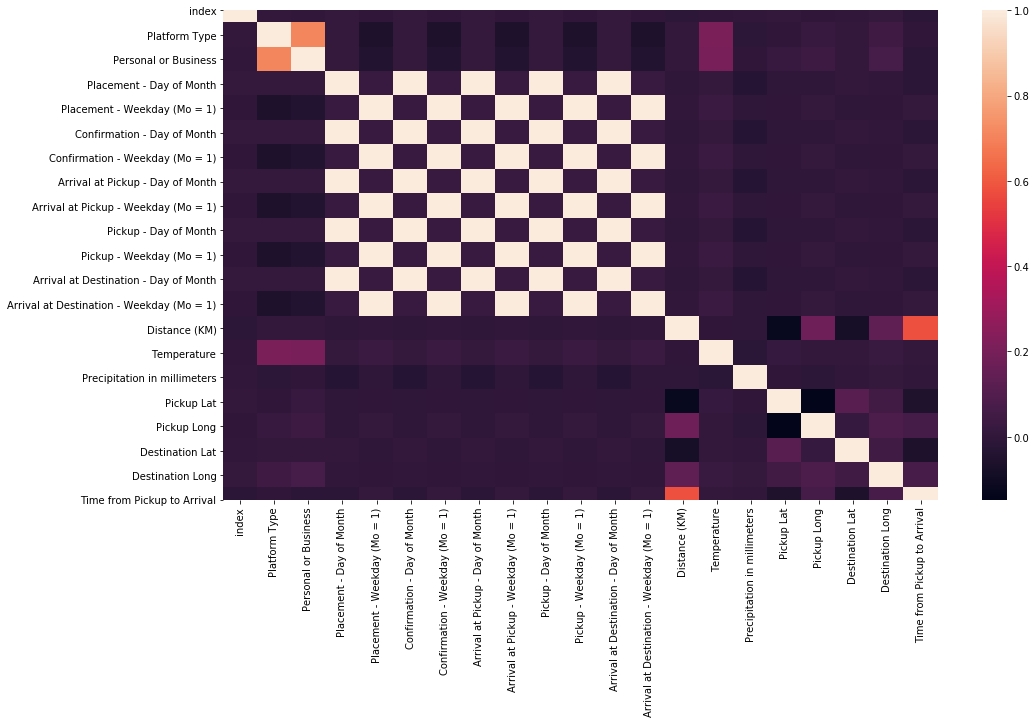

In [0]:
plt.figure(figsize=(16,9)) 
sns.heatmap(Train.corr())

In [0]:
### the variable to be predicted
Target = Train['Time from Pickup to Arrival']

In [0]:
Test.columns

Index(['index', 'Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [0]:
abs(5-10)

5

In [0]:
Test['Pickup - Time'] = pd.to_timedelta(Test['Pickup - Time'])
Test['Arrival at Pickup - Time'] = pd.to_timedelta(Test['Arrival at Pickup - Time'])
Test['Time from Pickup to Arrival'] = abs(Test['Pickup - Time'] - Test['Arrival at Pickup - Time'])
Test['Time from Pickup to Arrival'] = Test['Time from Pickup to Arrival'].dt.total_seconds().astype(int)

In [0]:
#### the features for prediction
features = Train.drop(columns=['Precipitation in millimeters','Time from Pickup to Arrival','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time', 'Pickup - Time', 'Arrival at Pickup - Time', 'Confirmation - Time', 'Placement - Time', 'Vehicle Type',])

In [0]:
features.shape

(21201, 20)

In [0]:
Y_train= Target.values.reshape(-1,1)
X_train = features.values
Y_test = Test['Time from Pickup to Arrival'].values.reshape(-1,1)
X_test = Test.drop(columns=['Precipitation in millimeters','Time from Pickup to Arrival', 'Pickup - Time', 'Arrival at Pickup - Time', 'Confirmation - Time', 'Placement - Time', 'Vehicle Type',]).values

In [0]:
X_test.shape

(7068, 20)

In [0]:
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

### LinearRegression

In [0]:
ln = LinearRegression(normalize=True)

In [0]:
ln.fit(X_train, Y_train)
y_predict = ln.predict(X_test)

In [0]:
RMSE = sqrt(mean_squared_error(Y_test, y_predict))

In [0]:
print(RMSE)

6582.100018293237


In [0]:
df = pd.DataFrame(y_predict,columns=['Predicted total time'])
Actual = pd.DataFrame(Test['Time from Pickup to Arrival'])
Order = pd.DataFrame(Test['Order No'])
j=Order.join(Actual)
j.join(df).to_csv('sub1.csv')

### ElasticNet

In [0]:
el = ElasticNetCV(cv=5,alphas=(0.1,0.01,0.001),l1_ratio = (0.1,0.25,0.5,0.75,0.8,0.9),normalize=True,random_state=1)

In [0]:
el.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=(0.1, 0.01, 0.001), copy_X=True, cv=5, eps=0.001,
             fit_intercept=True, l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8, 0.9),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
             positive=False, precompute='auto', random_state=1,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
print(el.alpha_)
print(el.l1_ratio_)

0.001
0.9


In [0]:
Test.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,19248,3355,Bike,3,1,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,04:53:04,27,3,05:06:47,8,23.24612,6.651759,-1.333275,36.870815,-1.305249,36.82239,192,823


In [0]:
y_predicted = el.predict(X_test)

In [0]:
RMSE = sqrt(mean_squared_error(Y_test, y_predicted))

In [0]:
print(RMSE)

6567.22173804238


In [0]:
df = pd.DataFrame(y_predicted,columns=['Predicted total time'])
Actual = pd.DataFrame(Test['Time from Pickup to Arrival'])
Order = pd.DataFrame(Test['Order No'])
j=Order.join(Actual)
j.join(df).to_csv('sub2.csv')

### actual train and test

In [0]:
Actual_Train = pd.read_csv('Train.csv')
Actual_Test = pd.read_csv('Test.csv')

In [0]:
Act_Train = Actual_Train
Act_Test = Actual_Test

In [0]:
order_no = [int(i.split('_')[-1]) for i in Act_Test['Order No']]
user_id = [int(i.split('_')[-1]) for i in Act_Test['User Id']]
rider_id = [int(i.split('_')[-1]) for i in Act_Test['Rider Id']]
Act_Test['Order No'] = pd.DataFrame(order_no)
Act_Test['User Id'] = pd.DataFrame(user_id)
Act_Test['Rider Id'] = pd.DataFrame(rider_id)
order_no = [int(i.split('_')[-1]) for i in Act_Train['Order No']]
user_id = [int(i.split('_')[-1]) for i in Act_Train['User Id']]
rider_id = [int(i.split('_')[-1]) for i in Act_Train['Rider Id']]
Act_Train['Order No'] = pd.DataFrame(order_no)
Act_Train['User Id'] = pd.DataFrame(user_id)
Act_Train['Rider Id'] = pd.DataFrame(rider_id)

In [0]:
Act_Test['Pickup - Time'] = pd.to_timedelta(Act_Test['Pickup - Time'])
Act_Test['Arrival at Pickup - Time'] = pd.to_timedelta(Act_Test['Arrival at Pickup - Time'])
Act_Test['Time from Pickup to Arrival'] = abs(Act_Test['Pickup - Time'] - Act_Test['Arrival at Pickup - Time'])
Act_Test['Time from Pickup to Arrival'] = Act_Test['Time from Pickup to Arrival'].dt.total_seconds().astype(int)

In [0]:
### where business= 1 and personal = 0
Act_Train['Personal or Business']=pd.get_dummies(Act_Train['Personal or Business'])
Act_Test['Personal or Business']=pd.get_dummies(Act_Test['Personal or Business'])

In [0]:
Act_Train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
#### filling null values with mean including precipitation
Act_Train['Temperature'] = Act_Train['Temperature'].fillna(Act_Train['Temperature'].mean())
Act_Test['Temperature'] = Act_Test['Temperature'].fillna(Act_Test['Temperature'].mean())

In [0]:
Act_Train.isnull().sum().sum()

20649

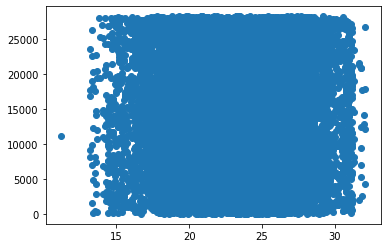

In [0]:
plt.scatter(x=Act_Train['Temperature'],y=Act_Train['Order No'])

In [0]:
features = Act_Train.drop(columns=['Precipitation in millimeters','Time from Pickup to Arrival','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time', 'Pickup - Time', 'Arrival at Pickup - Time', 'Confirmation - Time', 'Placement - Time', 'Vehicle Type',])

In [0]:
features.isnull().sum()

Order No                                0
User Id                                 0
Platform Type                           0
Personal or Business                    0
Placement - Day of Month                0
Placement - Weekday (Mo = 1)            0
Confirmation - Day of Month             0
Confirmation - Weekday (Mo = 1)         0
Arrival at Pickup - Day of Month        0
Arrival at Pickup - Weekday (Mo = 1)    0
Pickup - Day of Month                   0
Pickup - Weekday (Mo = 1)               0
Distance (KM)                           0
Temperature                             0
Pickup Lat                              0
Pickup Long                             0
Destination Lat                         0
Destination Long                        0
Rider Id                                0
dtype: int64

In [0]:
x_act_train = features.values
y_act_train = Act_Train['Time from Pickup to Arrival'].values

In [0]:
y_test = Act_Test['Time from Pickup to Arrival'].values.reshape(-1,1)
x_test = Act_Test.drop(columns=['Precipitation in millimeters','Time from Pickup to Arrival', 'Pickup - Time', 'Arrival at Pickup - Time', 'Confirmation - Time', 'Placement - Time', 'Vehicle Type']).values

In [0]:
x_test

array([[ 1.92480000e+04,  3.35500000e+03,  3.00000000e+00, ...,
        -1.30524910e+00,  3.68223899e+01,  1.92000000e+02],
       [ 1.27360000e+04,  3.64700000e+03,  3.00000000e+00, ...,
        -1.27700660e+00,  3.68239068e+01,  8.68000000e+02],
       [ 7.68000000e+02,  2.15400000e+03,  3.00000000e+00, ...,
        -1.27657360e+00,  3.68513646e+01,  2.60000000e+01],
       ...,
       [ 1.96900000e+03,  1.36000000e+02,  3.00000000e+00, ...,
        -1.26496050e+00,  3.67981777e+01,  3.79000000e+02],
       [ 1.05910000e+04,  1.97900000e+03,  3.00000000e+00, ...,
        -1.27202690e+00,  3.68174107e+01,  4.74000000e+02],
       [ 1.60300000e+03,  1.72100000e+03,  3.00000000e+00, ...,
        -1.30040620e+00,  3.68297410e+01,  7.60000000e+01]])

In [0]:
ln = LinearRegression(normalize=True)
ln.fit(x_act_train, y_act_train)
y_predict = ln.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, y_predict))
print(f'RMSE FOR LINEAR REGRESSION : {RMSE}')

RMSE FOR LINEAR REGRESSION : 6582.100018293237


#### RMSE = 6582.122882318993

In [0]:
df = pd.DataFrame(y_predict,columns=['Predicted total time'])
Actual = pd.DataFrame(Act_Test['Time from Pickup to Arrival'])
Order = pd.DataFrame(Actual_Test['Order No'])
j=Order.join(Actual)
j.join(df).to_csv('sub3.csv')

In [0]:
ele = ElasticNetCV(cv=5,alphas=(0.1,0.01,0.005,0.0025,0.001),selection='random', l1_ratio = (0.1,0.25,0.5,0.75,0.8,0.9),normalize=True,random_state=1)
ele.fit(x_act_train, y_act_train)
print(f'ele.alpha_{ele.alpha_}')
print(f'ele.l1_ratio_{ele.l1_ratio_}')

In [0]:
y_predicted = ele.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, y_predicted))
print(f'RMSE FOR ELASTICNET CV : {RMSE}')

In [0]:
df = pd.DataFrame(y_predicted,columns=['Predicted total time'])
order =[f'Order_No_{i}' for i in Actual_Test['Order No']]
order =pd.DataFrame(order,columns=['Order No'])
Submission1 = order.join(df)
Submission1.to_csv('Olang_Submission1.csv',index=False)

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
kn = KNeighborsRegressor(103,p=1)
kn.fit(x_act_train, y_act_train)
y_predic = kn.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, y_predic))
print(RMSE)

In [0]:
plt.scatter(x=Order,y=df)

deeplearning for regression

In [0]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
x_act_train.shape[1]

In [0]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=x_act_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x_act_train, y_act_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), sqrt(results.std())))

KeyboardInterrupt: ignored

In [0]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_act_train, y_act_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), sqrt(results.std())))

In [0]:
#####neural network
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [0]:
def modeel():
  NN_model = Sequential()

  # The Input Layer :
  NN_model.add(Dense(100, kernel_initializer='normal',input_dim = x_act_train.shape[1], activation='relu'))

  # The Hidden Layers :
  NN_model.add(Dense(300, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(300, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(300, kernel_initializer='normal',activation='relu'))

  # The Output Layer :
  NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

  # Compile the network :
  NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  return NN_model

In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
model = NN_model

In [0]:
model.fit(x_act_train, y_act_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 16960 samples, validate on 4241 samples
Epoch 1/500
16960/16960 [==============================] - 3s 184us/step - loss: 809.2521 - mean_absolute_error: 809.2521 - val_loss: 749.5694 - val_mean_absolute_error: 749.5694

Epoch 00001: val_loss improved from inf to 749.56940, saving model to Weights-001--749.56940.hdf5
Epoch 2/500
16960/16960 [==============================] - 2s 112us/step - loss: 725.4220 - mean_absolute_error: 725.4220 - val_loss: 660.9721 - val_mean_absolute_error: 660.9721

Epoch 00002: val_loss improved from 749.56940 to 660.97212, saving model to Weights-002--660.97212.hdf5
Epoch 3/500
16960/16960 [==============================] - 2s 113us/step - loss: 649.8710 - mean_absolute_error: 649.8710 - val_loss: 664.8095 - val_mean_absolute_error: 664.8095

Epoch 00003: val_loss did not improve from 660.97212
Epoch 4/500
16960/16960 [==============================] - 2s 114us/step - loss: 619.0242 - mean_absolute_error: 619.0242 - val_loss: 563.2596 - val_mean_ab

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-270--525.80750.hdf5' # choose the best checkpoint 
model.load_weights(wights_file) # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# New Section

In [0]:
predictions = NN_model.predict(x_test)

In [0]:
yy = pd.DataFrame(predictions,columns=['Predicted total time'])
orde = [f'Order_No_{i}' for i in Actual_Test['Order No']]
orde = pd.DataFrame(orde,columns=['Order No'])
Submission2 = orde.join(yy)
Submission2.to_csv('Castro_Olang_SubmissionN.csv',index=False)

In [0]:
train_X, val_X, train_y, val_y = train_test_split(x_act_train,y_act_train, test_size = 0.2, random_state = 14)



In [0]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

In [0]:
predicted_prices = model.predict(x_test)

In [0]:
import xgboost

In [0]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=1,
                 gamma=0.5,                 
                 learning_rate=0.07,
                 max_depth=1000,
                 min_child_weight=1000000,
                 n_estimators=43,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=1,
                 seed=42)
best_xgb_model.fit(x_act_train,y_act_train,verbose=False)

[13:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=1000, min_child_weight=1000000, missing=None,
             n_estimators=43, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=1,
             verbosity=1)

In [0]:
y_predd = best_xgb_model.predict(x_test)

In [0]:
RMSE = sqrt(mean_squared_error(y_test,y_predd))
print('XGBoost validation RMSE = ',RMSE)

XGBoost validation RMSE =  6572.0429103080505


In [0]:
y = pd.DataFrame(y_predd,columns=['Predicted total time'])
orde = [f'Order_No_{i}' for i in Actual_Test['Order No']]
orde = pd.DataFrame(orde,columns=['Order No'])
Submission2 = orde.join(yy)
Submission2.to_csv('Castro_Olang_SubmissionXGBbb.csv',index=False)

In [0]:
XGBModel = XGBRegressor()
XGBModel.fit(x_act_train,y_act_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, XGBpredictions))
print('XGBoost validation RMSE = ',RMSE)

[12:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation RMSE =  6581.757805429911


In [0]:
yy = pd.DataFrame(XGBpredictions,columns=['Predicted total time'])
orde = [f'Order_No_{i}' for i in Actual_Test['Order No']]
orde = pd.DataFrame(orde,columns=['Order No'])
Submission2 = orde.join(yy)
Submission2.to_csv('Castro_Olang_SubmissionXGB.csv',index=False)

indepth keras

In [0]:
from keras.optimizers import Adam

In [0]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
 
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
 
	# return our model
	return model

In [0]:
from keras.models import Model

In [0]:
model = create_mlp(x_act_train.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
 
# train the model
print("[INFO] training model...")
model.fit(x_act_train, y_act_train, validation_data=(x_test, y_test),
	epochs=270, batch_size=8)


[INFO] training model...
Train on 21201 samples, validate on 7068 samples
Epoch 1/270
21201/21201 [==============================] - 5s 246us/step - loss: 416.0347 - val_loss: 70.8000
Epoch 2/270
21201/21201 [==============================] - 4s 186us/step - loss: 197.6622 - val_loss: 70.7828
Epoch 3/270
21201/21201 [==============================] - 4s 183us/step - loss: 181.8520 - val_loss: 101.3663
Epoch 4/270
21201/21201 [==============================] - 4s 185us/step - loss: 176.3558 - val_loss: 69.9603
Epoch 5/270
21201/21201 [==============================] - 4s 187us/step - loss: 160.4546 - val_loss: 77.3274
Epoch 6/270
21201/21201 [==============================] - 4s 184us/step - loss: 154.8946 - val_loss: 97.4210
Epoch 7/270
21201/21201 [==============================] - 4s 182us/step - loss: 148.5906 - val_loss: 92.2631
Epoch 8/270
21201/21201 [==============================] - 4s 182us/step - loss: 147.8091 - val_loss: 115.3026
Epoch 9/270
21201/21201 [==================

In [0]:
preds = model.predict(x_test)
rmse = sqrt(mean_squared_error(preds, y_test))
print(rmse)

6802.129265764246


In [0]:
import functools

import numpy
import scipy.optimize
import algopy
import numdifftools
import pandas
import patsy


def get_aic(y, X, theta):
    return 2*len(theta) + 2*get_neg_ll(y, X, theta)

def get_neg_ll(y, X, theta):
    alpha = theta[-1]
    beta = theta[:-1]
    a = alpha * algopy.exp(algopy.dot(X, beta))
    ll = algopy.sum(
        -y*algopy.log1p(1/a) +
        -algopy.log1p(a) / alpha +
        algopy.special.gammaln(y + 1/alpha) +
        -algopy.special.gammaln(y + 1) +
        -algopy.special.gammaln(1/alpha))
    neg_ll = -ll
    return neg_ll

def eval_grad(f, theta):
    theta = algopy.UTPM.init_jacobian(theta)
    return algopy.UTPM.extract_jacobian(f(theta))

def eval_hess(f, theta):
    theta = algopy.UTPM.init_hessian(theta)
    return algopy.UTPM.extract_hessian(len(theta), f(theta))

def main():
    y = y_act_train
    X = x_act_train

    # define the objective function and the autodiff gradient and hessian
    f = functools.partial(get_neg_ll, y, X)
    g = functools.partial(eval_grad, f)
    h = functools.partial(eval_hess, f)

    # init the search for max likelihood parameters
    theta0 = numpy.array([
        numpy.log(numpy.mean(y)),
        0, 0, 0, 0,
        0.5,
        ], dtype=float)

    # do the max likelihood search
    results = scipy.optimize.fmin_ncg(
            f,
            theta0,
            fprime=g,
            fhess=h,
            avextol=1e-6,
            )

    # compute the hessian a couple of different ways
    algopy_hessian = h(results)
    num_hessian = numdifftools.Hessian(f)(results)

    # report the results of the search including aic and standard error
    print('search results:')
    print(results)
    print()
    print('aic:')
    print(get_aic(y, X, results))
    print()
    print('standard error using observed fisher information,')
    print('with hessian computed using algopy:')
    print(numpy.sqrt(numpy.diag(scipy.linalg.inv(algopy_hessian))))
    print()
    print('standard error using observed fisher information,')
    print('with hessian computed using numdifftools:')
    print(numpy.sqrt(numpy.diag(scipy.linalg.inv(num_hessian))))
    print()


if __name__ == '__main__':
    main()

ModuleNotFoundError: ignored

In [0]:
yy = pd.DataFrame(preds,columns=['Predicted total time'])
orde = [f'Order_No_{i}' for i in Actual_Test['Order No']]
orde = pd.DataFrame(orde,columns=['Order No'])
Submission2 = orde.join(yy)
Submission2.to_csv('Castro_Olang_Submissionxgb.csv',index=False)

#### scatter plot of predicted data 

In [0]:
import numpy as np

In [0]:
### feature x_act_train, target y_act_train, actual y_test,predictor x_test

In [0]:
def hypothesis(theta,X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0, X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [0]:
def BGD(theta,alpha,num_iters,h,X,y,n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h - y) * X.transpose()[j])
        h = hypothesis(theta,X,n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [0]:
def linear_regression(X,y,alpha,num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column,X),axis = 1)
    ####initializing the parameter vector
    theta = np.zeros(n+1)
    ####hypothesis calculation
    h = hypothesis(theta,X,n)
    ####returning the optimised parameters by gradient descent
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [0]:
###reading data
X_train = x_act_train
y_train = y_act_train

In [0]:
### feature scaling
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])

In [0]:
for i in range(0,X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0,X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [0]:
print("MEAN XTRAIN: {mean},'\n' ,STD XTRAIN: {std}")

In [0]:
mean1 = np.ones(x_test.shape[1])
std1 = np.ones(x_test.shape[1])

In [0]:
####for test data
for k in range(0,x_test.shape[1]):
    mean1[k] = np.mean(x_test.transpose()[k])
    std1[k] = np.std(x_test.transpose()[k])
    for l in range(0,x_test.shape[0]):
        x_test[l][k] = (x_test[l][k] - mean1[k])/std1[k]

In [0]:
print(f"mean xtest: {mean1}, '\n', std xtext: {std1}")

In [0]:
###calling the principal function with learnng_rate = 0.0001 and num_iters = 300000
theta, cost = linear_regression(X_train,y_train,0.0001,300000)

In [0]:
cost = list(cost)
n_iterations =[x for x in range(1,300001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('cost')

In [0]:
###getting the predictions
x_test = np.concatenate((np.ones((x_test.shape[0],1)),x_test),axis=1)
y_predictions = hypothesis(theta,x_test,x_test.shape[1] - 1)

In [0]:
RMSE = sqrt(mean_squared_error(y_test, y_predictions))
print(f"grad rmse : {RMSE}")

In [0]:
yy = pd.DataFrame(y_predictions,columns=['Predicted total time'])
orde = [f'Order_No_{i}' for i in Actual_Test['Order No']]
orde = pd.DataFrame(orde,columns=['Order No'])
Submission2 = orde.join(yy)
Submission2.to_csv('Castro_Olang_Submission.csv',index=False)